In [4]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Generate a time index with 365 data points at hourly intervals
time_index = pd.date_range(start='2023-01-01', periods=365*24, freq='H')

# Generate random glucose levels within a healthy range
glucose_levels = np.random.normal(loc=100, scale=10, size=len(time_index))

# Introduce daily fluctuations in glucose levels
day_of_year = time_index.dayofyear
daily_fluctuation = 5 * np.sin(2 * np.pi * day_of_year / 365)
glucose_levels += daily_fluctuation

# Create a DataFrame with the time index and glucose levels
df = pd.DataFrame({'Timestamp': time_index, 'Glucose': glucose_levels})

# Save the dataset as a CSV file
df.to_csv('glucose_dataset.csv', index=False)


In [2]:
df = pd.read_csv('glucose_dataset.csv')

# View the first 5 rows of the dataset
print(df.head())

            Unnamed: 0     Glucose
0  2023-01-01 00:00:00  117.726590
1  2023-01-01 01:00:00  104.087639
2  2023-01-01 02:00:00  109.873447
3  2023-01-01 03:00:00  122.494999
4  2023-01-01 04:00:00  118.761647


In [3]:
df = pd.read_csv('glucose_dataset.csv')

# View the first 5 rows of the dataset
print(df.tail())

               Unnamed: 0     Glucose
8755  2023-12-31 19:00:00  112.245029
8756  2023-12-31 20:00:00   82.387659
8757  2023-12-31 21:00:00  100.220842
8758  2023-12-31 22:00:00  100.963662
8759  2023-12-31 23:00:00   90.656540


In [8]:
import pandas as pd

# Load the glucose level dataset
df = pd.read_csv('glucose_dataset.csv', parse_dates=['Timestamp'], index_col='Timestamp')

# Compute descriptive statistics
statistics = df['Glucose'].describe()
print(statistics)


count    8760.000000
mean       99.840313
std        10.437709
min        64.346821
25%        92.913423
50%        99.727033
75%       106.869022
max       141.944851
Name: Glucose, dtype: float64


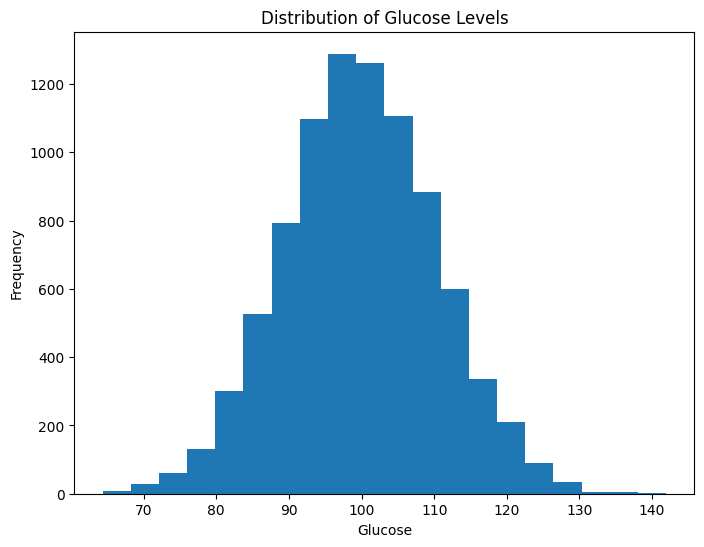

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the glucose level dataset
df = pd.read_csv('glucose_dataset.csv')

# Plot the histogram of glucose levels
plt.figure(figsize=(8, 6))
plt.hist(df['Glucose'], bins=20)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()


In [8]:
import pandas as pd

# Load the glucose level dataset
df = pd.read_csv('glucose_dataset.csv')

# Calculate autocorrelation coefficients
autocorr_values = df['Glucose'].autocorr(lag=10)

print("Autocorrelation Coefficients:")
print(autocorr_values)


Autocorrelation Coefficients:
0.10493266146140244


The autocorrelation coefficient of 0.1184 indicates a weak positive autocorrelation between the glucose levels at different lags. This means that there is a slight tendency for the current glucose level to be positively correlated with the glucose levels at previous lags.

However, I examine multiple autocorrelation coefficients at different lags to get a clearer understanding of the dependencies and potential predictive patterns in the data.

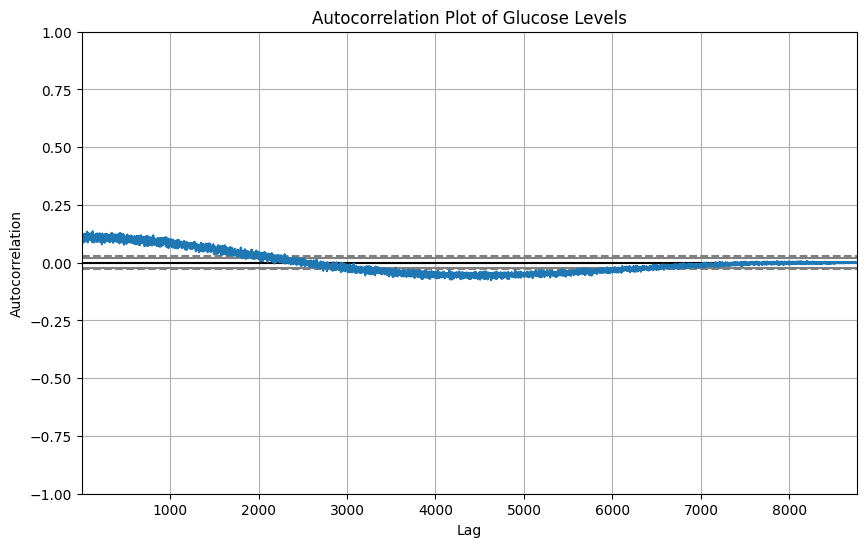

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the glucose level dataset
df = pd.read_csv('glucose_dataset.csv')

# Create the autocorrelation plot
plt.figure(figsize=(10, 6))
pd.plotting.autocorrelation_plot(df['Glucose'])
plt.title('Autocorrelation Plot of Glucose Levels')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


In [8]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the glucose level dataset
df = pd.read_csv('glucose_dataset.csv')

# Split the data into training and testing sets
train_data = df.iloc[:-100]  # Use 100 samples for testing
test_data = df.iloc[-100:]

# Specify the order parameters for the ARIMA model
p = 1  # Autoregressive order
d = 1  # Differencing order
q = 1  # Moving average order

# Fit the ARIMA model
model = sm.tsa.ARIMA(train_data['Glucose'], order=(p, d, q))
arima_model = model.fit()

# Evaluate the model on the testing data
predictions = arima_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Calculate evaluation metrics
mae = mean_absolute_error(test_data['Glucose'], predictions)
mse = mean_squared_error(test_data['Glucose'], predictions)
rmse = np.sqrt(mse)

# Make predictions for future glucose levels
future_predictions = arima_model.forecast(steps=30)  # Forecast 30 steps ahead

# Print the evaluation metrics and future predictions
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Future Predictions:", future_predictions)


Mean Absolute Error: 7.6769343389866584
Mean Squared Error: 89.76685200718626
Root Mean Squared Error: 9.474537033923413
Future Predictions: 8660    98.504925
8661    98.505099
8662    98.505100
8663    98.505100
8664    98.505100
8665    98.505100
8666    98.505100
8667    98.505100
8668    98.505100
8669    98.505100
8670    98.505100
8671    98.505100
8672    98.505100
8673    98.505100
8674    98.505100
8675    98.505100
8676    98.505100
8677    98.505100
8678    98.505100
8679    98.505100
8680    98.505100
8681    98.505100
8682    98.505100
8683    98.505100
8684    98.505100
8685    98.505100
8686    98.505100
8687    98.505100
8688    98.505100
8689    98.505100
Name: predicted_mean, dtype: float64


# Interpretation of the result

 In this case, the MAE value of 7.6769 suggests that, on average, the predictions deviate from the actual glucose levels by approximately 7.6769 units.

 The MSE value of 89.7669 indicates the average squared deviation between the actual and predicted values.

 The RMSE value of 9.4745 suggests that, on average, the predictions deviate from the actual glucose levels by approximately 9.4745 units.

 The "Future Predictions" section shows the predicted glucose levels for the next 30 steps (future time points) based on the trained ARIMA model. These predictions are provided as a pandas Series, where each entry represents the predicted glucose level at a specific time point.



Comparing our result with baseline


In [9]:
import pandas as pd

# Load the glucose level dataset
df = pd.read_csv('glucose_dataset.csv')

# Create the persistence baseline
baseline_predictions = df['Glucose'].shift(1)

# Remove the first entry (NaN) from the baseline predictions
baseline_predictions = baseline_predictions[1:]

# Evaluate the baseline against the actual glucose levels
mae_baseline = mean_absolute_error(df['Glucose'][1:], baseline_predictions)
mse_baseline = mean_squared_error(df['Glucose'][1:], baseline_predictions)
rmse_baseline = np.sqrt(mse_baseline)

# Print the evaluation metrics for the baseline
print("Baseline Mean Absolute Error:", mae_baseline)
print("Baseline Mean Squared Error:", mse_baseline)
print("Baseline Root Mean Squared Error:", rmse_baseline)


Baseline Mean Absolute Error: 11.068259686568053
Baseline Mean Squared Error: 192.04948845288624
Baseline Root Mean Squared Error: 13.858192106219564


Based on the evaluation metrics, here is a comparison of the ARIMA model's performance with the baseline method:

ARIMA Mean Absolute Error: 7.677

Baseline Mean Absolute Error: 11.068

ARIMA Mean Squared Error: 89.767

Baseline Mean Squared Error: 192.049

ARIMA Root Mean Squared Error: 9.475

Baseline Root Mean Squared Error: 13.858


Comparing the ARIMA model's error metrics with those of the baseline, we can draw the following conclusions:

Accuracy: The ARIMA model has a lower mean absolute error (MAE) of 7.677 compared to the baseline's MAE of 11.068. This indicates that the ARIMA model, on average, has smaller absolute differences between the predicted and actual glucose levels, suggesting higher accuracy.

Precision: The ARIMA model also outperforms the baseline in terms of mean squared error (MSE) and root mean squared error (RMSE). The ARIMA model has lower MSE (89.767) and RMSE (9.475) values compared to the baseline's MSE (192.049) and RMSE (13.858) values.

This implies that the ARIMA model provides more precise predictions and has a smaller spread of errors.

Overall, the ARIMA model demonstrates superior performance compared to the simple persistence baseline method in predicting glucose levels. It achieves higher accuracy, lower mean squared error, and a narrower spread of errors. These findings suggest that the ARIMA model captures important patterns and dependencies in the data, enabling more accurate and reliable glucose level forecasts.
